## **Title of Project**
### Wine Quality Prediction

-------------

## **Objective**

- Understand the Dataset & cleanup (if required).
- Build classification models to predict the wine quality.
- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

## **Data Source**

Data is collected from this website :- https://archive.ics.uci.edu/dataset/186/wine+quality

## **Import Library**

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#for ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## **Import Data**

In [17]:
df =pd.read_csv('/content/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## **Describe Data**

In [18]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


## **Data Visualization**

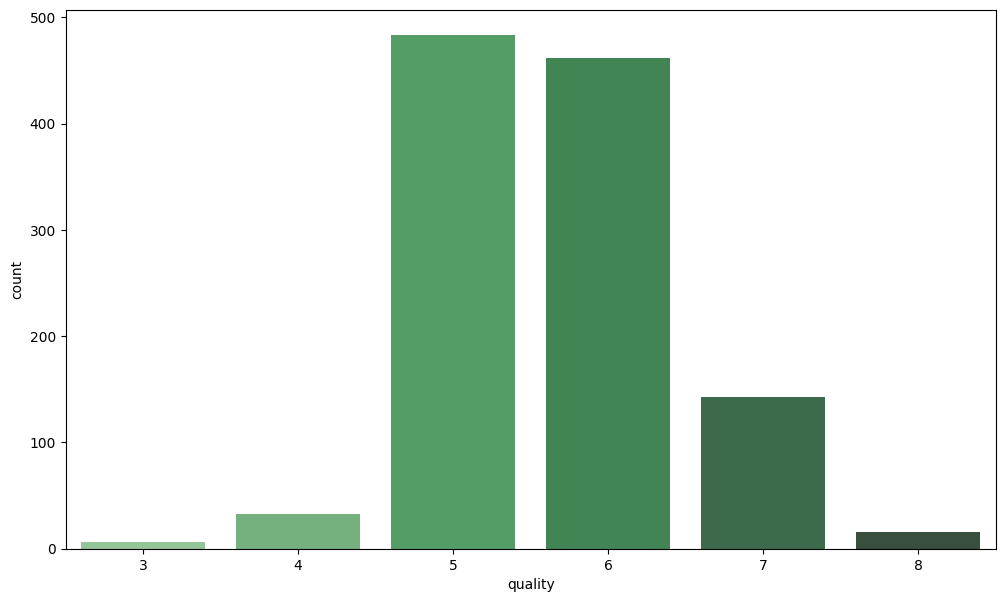

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(x='quality',data=df,palette='Greens_d')
plt.show()

### Correlation of dataset is given below

In [20]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


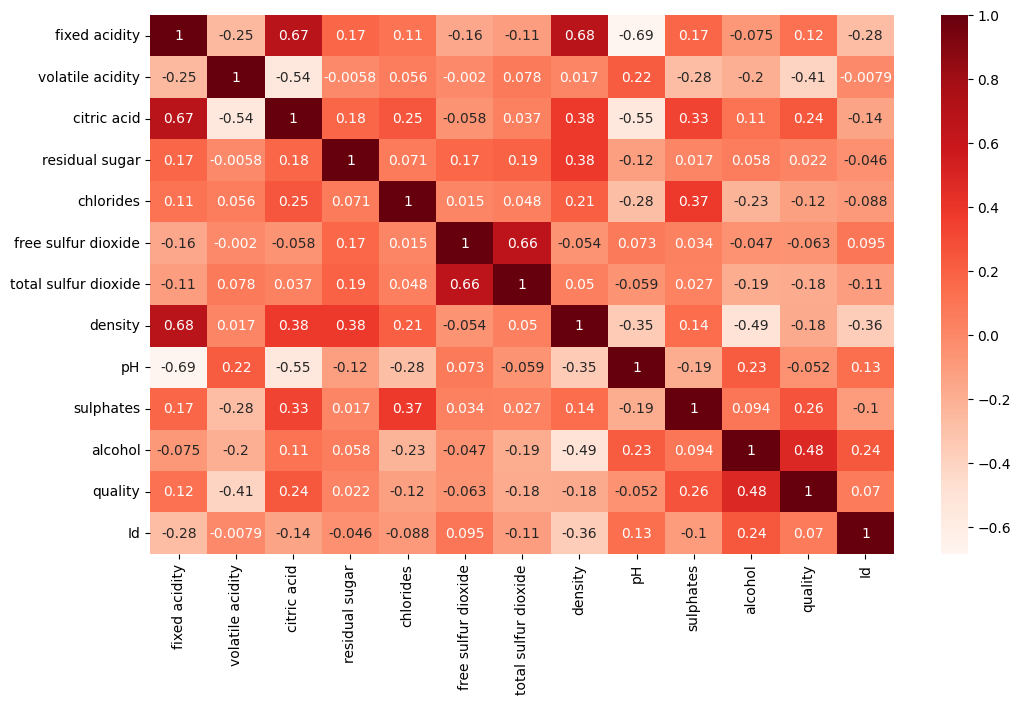

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

### Plot b/w total sulphur dioxide and free sulphur dioxide

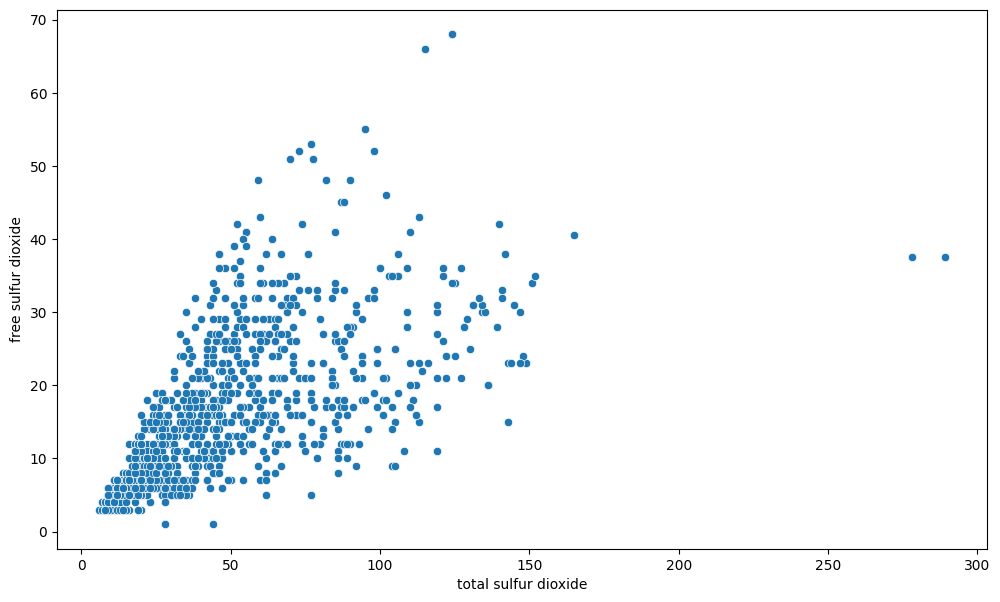

In [22]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='total sulfur dioxide',y='free sulfur dioxide',data=df)
plt.show()

### Quality of wine varies b/w 3-8,and the below plot give information about how the quality changes with respect to  volatile acidity

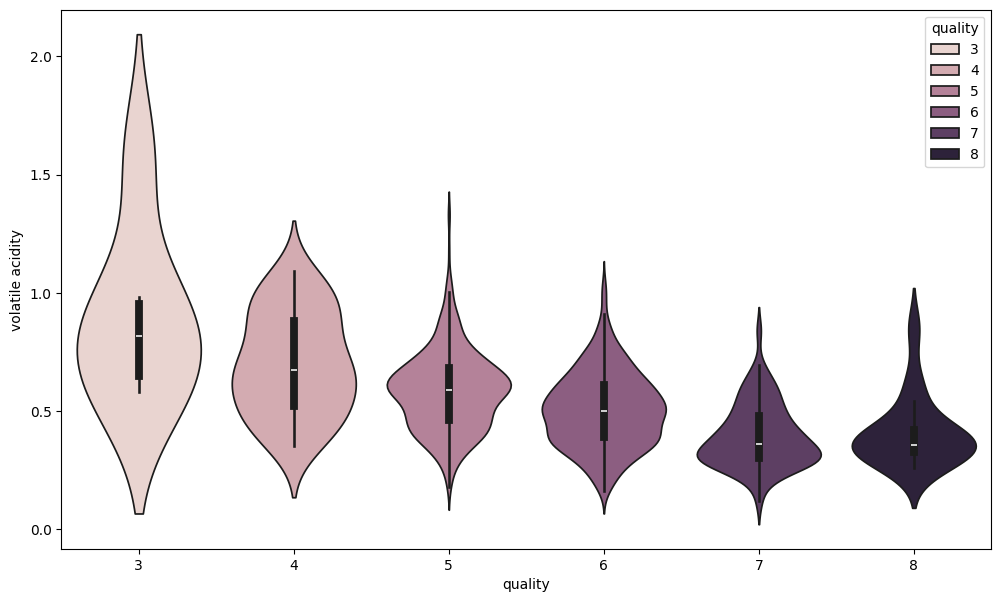

In [23]:
plt.figure(figsize=(12,7))
sns.violinplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

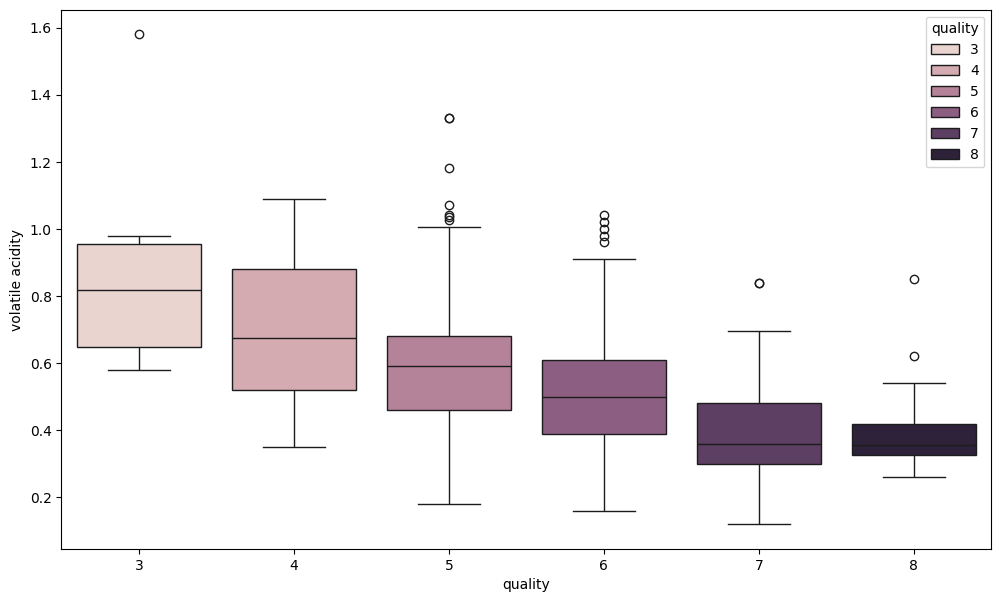

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

### The below plot explians in detail about how the density of wine varies with the fixed acidity

<Axes: xlabel='density', ylabel='fixed acidity'>

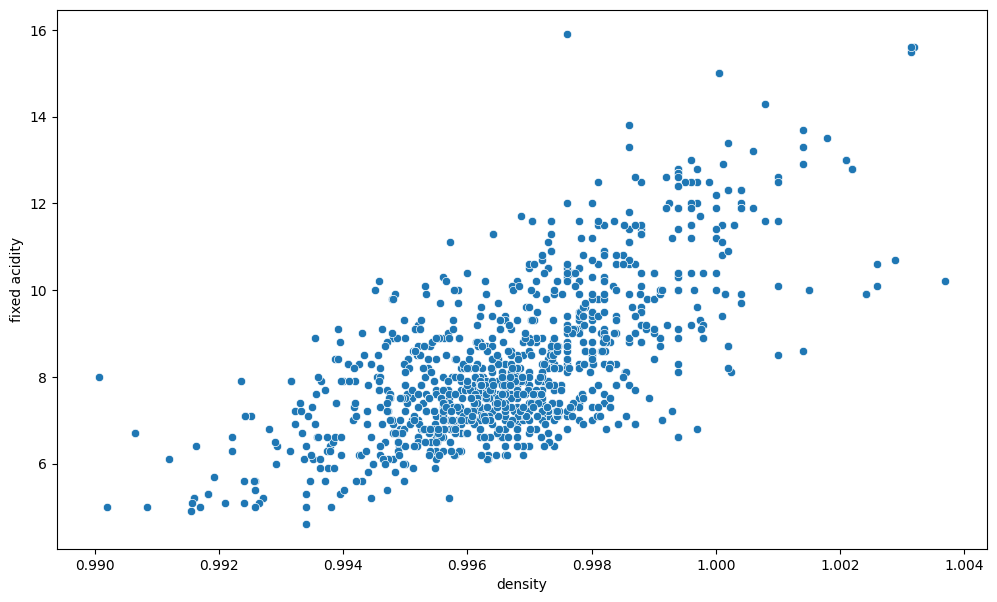

In [25]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='density',y='fixed acidity',data=df)

### The below plot explains about how volatile acidity of wine changes with respect to citric acid  

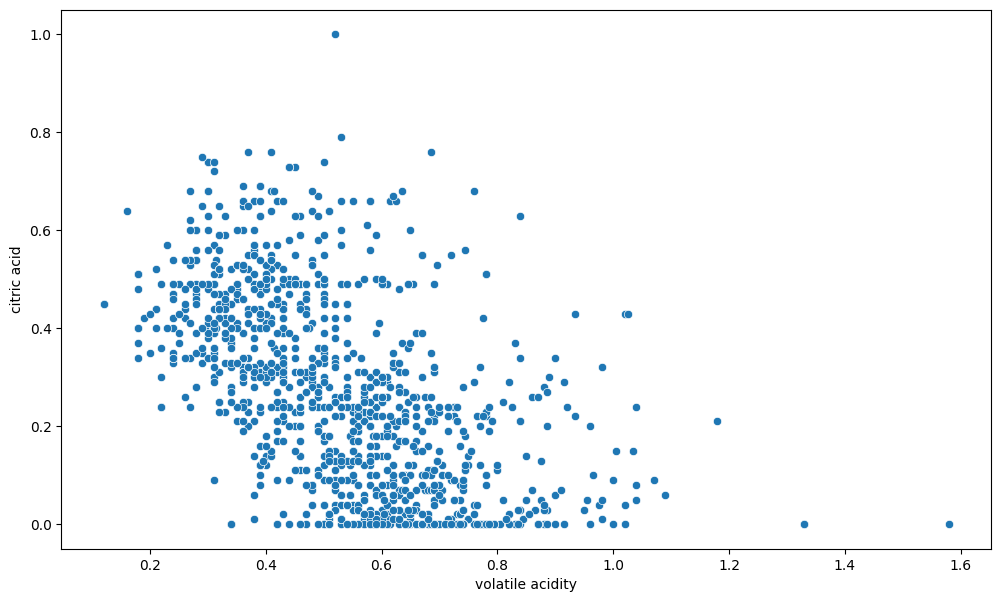

In [26]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='volatile acidity',y='citric acid',data=df)
plt.show()

### The below plot explains how quality of wine varies in according with sulphates in it

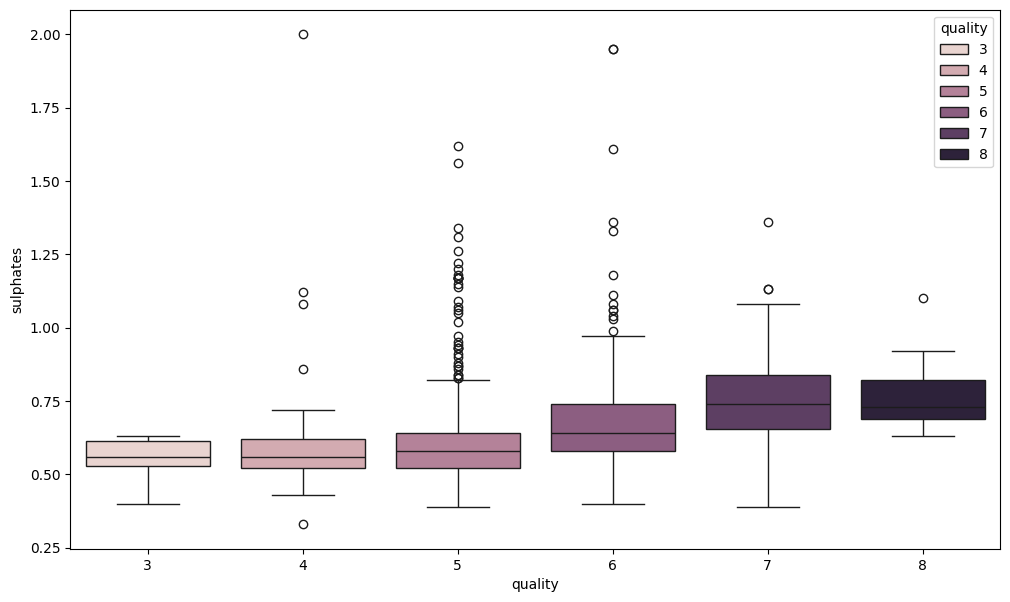

In [27]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='sulphates',data=df,hue='quality')
plt.show()

### The below plot describes about citric acid and volatile acidity

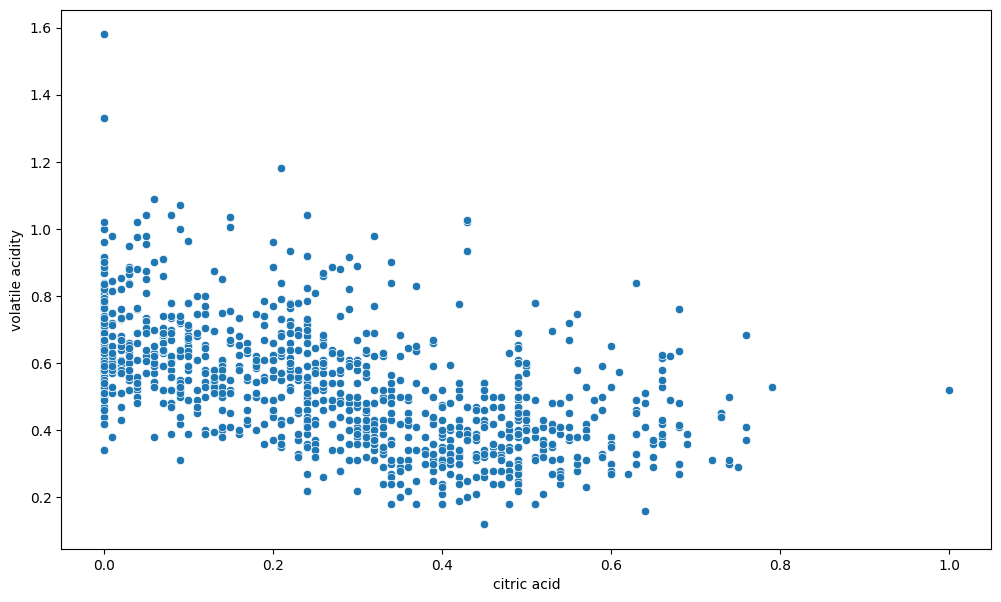

In [28]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='citric acid',y='volatile acidity',data=df)
plt.show()

## **Data Preprocessing**

In [29]:
for col in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    df[col]=df[col]/df[col].max()

### Splitting the dataset as 20% for testing and 80% for training

In [30]:
feature=np.array(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
label=np.array(df['quality'])

## **Train Test Split**

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(feature,label,test_size=0.2,random_state=0)

## **Modeling**

In [32]:
model_comp={}

### 1.Logistic Regression

In [33]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
y1=lgr.predict(xtest)
print(accuracy_score(ytest,y1))
print(f1_score(ytest,y1,average='weighted'))
print(classification_report(ytest,y1))

model_comp['logistic regression']=[accuracy_score(y1,ytest),f1_score(ytest,y1,average='weighted')]

0.6375545851528385
0.5818306114188381
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.69      0.82      0.75       100
           6       0.58      0.70      0.63        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.21      0.25      0.23       229
weighted avg       0.54      0.64      0.58       229



### 2. Decision Tree

In [35]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y2=dt.predict(xtest)

print(accuracy_score(ytest,y2))
print(f1_score(ytest,y2,average='weighted'))
print(classification_report(ytest,y2))

model_comp['decision tree']=[accuracy_score(y2,ytest),f1_score(ytest,y2,average='weighted')]

0.6026200873362445
0.6022106274604538
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.68      0.69       100
           6       0.59      0.62      0.60        92
           7       0.46      0.44      0.45        27
           8       0.33      0.50      0.40         2

    accuracy                           0.60       229
   macro avg       0.35      0.37      0.36       229
weighted avg       0.60      0.60      0.60       229



###  3 RandomForest

In [36]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y3=rf.predict(xtest)

print(accuracy_score(ytest,y3))
print(f1_score(ytest,y3,average='weighted'))
print(classification_report(ytest,y3))


model_comp['Random forest']=[accuracy_score(y3,ytest),f1_score(ytest,y3,average='weighted')]

0.6986899563318777
0.6813133368294274
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.75      0.80      0.78       100
           6       0.65      0.72      0.68        92
           7       0.64      0.52      0.57        27
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.34      0.34      0.34       229
weighted avg       0.67      0.70      0.68       229



### 4 KNN

In [37]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
y4=k.predict(xtest)

print(accuracy_score(ytest,y4))
print(f1_score(ytest,y4,average='weighted'))
print(classification_report(ytest,y4))

model_comp['KNN']=[accuracy_score(y4,ytest),f1_score(ytest,y4,average='weighted')]

0.5589519650655022
0.5395476430410928
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.64      0.69      0.66       100
           6       0.51      0.58      0.54        92
           7       0.33      0.22      0.27        27
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.25      0.25      0.25       229
weighted avg       0.53      0.56      0.54       229



### 5 SVC

In [38]:
s=SVC()
s.fit(xtrain,ytrain)
y5=s.predict(xtest)

print(accuracy_score(ytest,y5))
print(f1_score(ytest,y5,average='weighted'))
print(classification_report(ytest,y5))

model_comp['svc']=[accuracy_score(y5,ytest),f1_score(ytest,y5,average='weighted')]

0.6637554585152838
0.6069291484469779
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.81      0.77       100
           6       0.60      0.77      0.68        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.22      0.26      0.24       229
weighted avg       0.56      0.66      0.61       229



## **Model Evaluation**

accuracy and f1 scores of all applied models are given below¶

In [39]:
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score']
df1=df1.sort_values('F1_score',ascending=True)
df1.style.background_gradient(cmap='Greens')

,Accuracy,F1_score
KNN,0.558952,0.539548
logistic regression,0.637555,0.581831
decision tree,0.602620,0.602211
svc,0.663755,0.606929
Random forest,0.698690,0.681313


## **Explaination**

### 1. **Logistic Regression**

- **Explanation**:
  - we've scaled the features by dividing each feature by its maximum value.
  - The dataset was split into training (80%) and testing (20%) sets.
  - A logistic regression model was trained on the training data.
  - The accuracy on the test set is approximately **63%**.
  - The F1 score (weighted) is around **58%**.
  - The classification report provides precision, recall, and F1-score for each class.

### 2. **Decision Tree**

- **Explanation**:
  - we've used the same scaled features and split the data.
  - A Decision Tree classifier was trained on the training data.
  - The accuracy on the test set is approximately **60%**.
  - The F1 score (weighted) is around **60%**.
  - The classification report provides details for each class.

### 3. **Random Forest**

- **Explanation**:
  - we've followed the same preprocessing steps.
  - A Random Forest classifier was trained on the training data.
  - The accuracy on the test set is approximately **69%**.
  - The F1 score (weighted) is around **68%**.
  - The classification report provides class-wise metrics.

### 4. **K-Nearest Neighbors (KNN)**

- **Explanation**:
  - we've prepared the data as before.
  - A KNN classifier was trained on the training data.
  - The accuracy on the test set is approximately **55%**.
  - The F1 score (weighted) is around **53%**.
  - The classification report provides details for each class.

### 5. **Support Vector Classifier (SVC)**

- **Explanation**:
  - we've followed the same steps.
  - An SVC model was trained on the training data.
  - The accuracy on the test set is approximately **66%**.
  - The F1 score (weighted) is around **60%**.
  - The classification report provides precision, recall, and F1-score for each class.

Among the classifiers we’ve evaluated, the Random Forest model appears to perform the best based on the metrics we’ve considered